"""<br>
@Author: Prayag Bhoir<br>
@Date: 30-09-2024<br>
@Last Modified by: Prayag Bhoir<br>
@Last Modified time: 30-09-2024<br>
@Title : Python programs on Simple Linear Regression Bike shared prediction<br>
"""

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import StandardScaler

In [166]:
# Step 1: Load the Data
url = 'https://drive.google.com/uc?id=1ohN2o3zSZ2Xuy4CIdTWN-dTmciUXizst'
df = pd.read_csv(url)

In [167]:
# Step 2: Explore the Data
print(df.head())  # Display the first few rows of the dataset
print(df.info())  # Display information about the dataset

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 

In [168]:
#step 3: Saperate the features
X = df[['temp']]  # Feature: temperature
y = df[['cnt']]     # Target variable: bike shares

X.head(),y.head()


(   temp
 0  0.24
 1  0.22
 2  0.22
 3  0.24
 4  0.24,
    cnt
 0   16
 1   40
 2   32
 3   13
 4    1)

{'whiskers': [<matplotlib.lines.Line2D at 0x29a7c864560>,
 'caps': [<matplotlib.lines.Line2D at 0x29a7c864e30>,
 'boxes': [<matplotlib.lines.Line2D at 0x29a7c864110>],
 'medians': [<matplotlib.lines.Line2D at 0x29a7c8659d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29a7c865940>],
 'means': []}

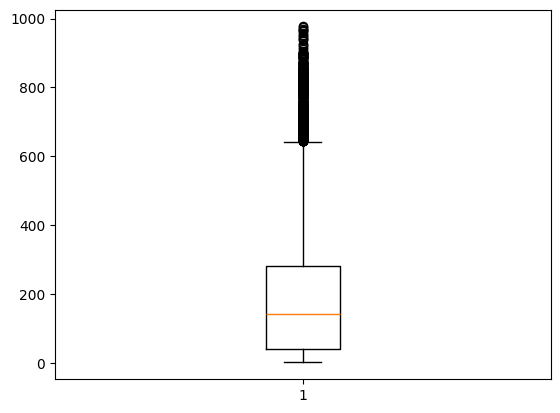

In [169]:
plt.boxplot(y)

In [199]:
# It has to much outliers so remove them
Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['cnt'] > lower_bound) & (df['cnt'] < upper_bound)]
# Step 3: Define features and target variable (after removing outliers)
X_filtered = df_filtered[['temp']]
y_filtered = df_filtered[['cnt']]   # Target variable: bike shares


In [196]:
y_filtered.shape

(16874, 1)

{'whiskers': [<matplotlib.lines.Line2D at 0x29a7f6d3c20>,
 'caps': [<matplotlib.lines.Line2D at 0x29a7f6d8110>,
 'boxes': [<matplotlib.lines.Line2D at 0x29a7f6d2de0>],
 'medians': [<matplotlib.lines.Line2D at 0x29a7f6d8f20>],
 'fliers': [<matplotlib.lines.Line2D at 0x29a7f6d9250>],
 'means': []}

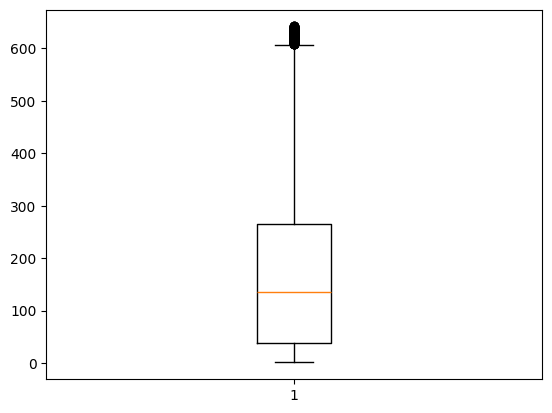

In [191]:
plt.boxplot(y_filtered)

In [200]:
# scale with standard scaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_x.fit_transform(X_filtered)
y_scaled = scaler_y.fit_transform(y_filtered)

In [201]:
# Step 4: Split the Data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)

In [202]:
# Step 5: Train the Model
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [203]:
# Step 6: Make Predictions
y_pred_scaled = model.predict(X_test_scaled)

In [212]:
# Accuracy matrics
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f"Mse = {mse}\nR2 = {r2}")

Mse = 0.8354915130668725
R2 = 0.16995088724526597


In [208]:
# De-scale
X_original = scaler_x.inverse_transform(X_scaled)
X_test_original = scaler_x.inverse_transform(X_test_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)
y_pred_original = scaler_y.inverse_transform(y_pred_scaled)

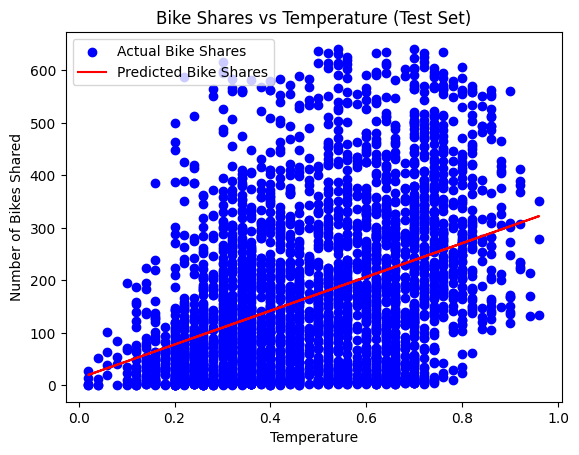

In [210]:
# Step 7: Visualize Results og version
plt.scatter(X_test_original, y_test_original, color='blue', label='Actual Bike Shares')
plt.plot(X_test_original, y_pred_original, color='red', label='Predicted Bike Shares')
plt.title('Bike Shares vs Temperature (Test Set)')
plt.xlabel('Temperature')
plt.ylabel('Number of Bikes Shared')
plt.legend()
plt.show()


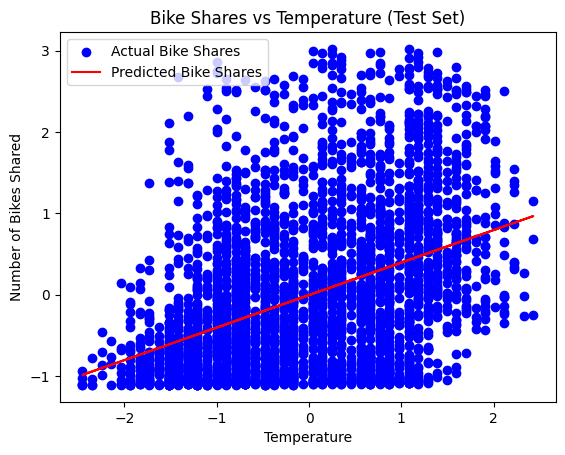

In [211]:
# Step 7: Visualize Results scaled version
plt.scatter(X_test_scaled, y_test_scaled, color='blue', label='Actual Bike Shares')
plt.plot(X_test_scaled, y_pred_scaled, color='red', label='Predicted Bike Shares')
plt.title('Bike Shares vs Temperature (Test Set)')
plt.xlabel('Temperature')
plt.ylabel('Number of Bikes Shared')
plt.legend()
plt.show()
